In [21]:
#imports & load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('olympics.csv')
df.head()

,country_name,country_3_letter_code,year,medal_count,gold_count,silver_count,bronze_count,game_location,game_season,GDP
0,Austria,AUT,1992,21,6,7,8,France,Winter,1.950781e+11
1,Canada,CAN,1992,7,2,3,2,France,Winter,5.943761e+11
2,Czechia,TCH,1992,3,0,0,3,France,Winter,3.480501e+10
3,Finland,FIN,1992,7,3,1,3,France,Winter,1.125325e+11
4,France,FRA,1992,9,3,5,1,France,Winter,1.401466e+12


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           1191 non-null   object 
 1   country_3_letter_code  1191 non-null   object 
 2   year                   1191 non-null   int64  
 3   medal_count            1191 non-null   int64  
 4   gold_count             1191 non-null   int64  
 5   silver_count           1191 non-null   int64  
 6   bronze_count           1191 non-null   int64  
 7   game_location          1191 non-null   object 
 8   game_season            1191 non-null   object 
 9   GDP                    1191 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 93.2+ KB


In [22]:
#select relevant cols
# - drop country_3_letter_code bc we already have country_name (it doesn't provide any
    #predictive power)
# - can't use gold_, silver_, or bronze_counts as it would defeat the purpose of
    #predicting medal_count (bc model can just sum up each medal type)

selected_cols= ['country_name', 'year', 'medal_count', 'game_location', 'game_season', 'GDP']

df= df[selected_cols]
df

,country_name,year,medal_count,game_location,game_season,GDP
0,Austria,1992,21,France,Winter,1.950781e+11
1,Canada,1992,7,France,Winter,5.943761e+11
2,Czechia,1992,3,France,Winter,3.480501e+10
3,Finland,1992,7,France,Winter,1.125325e+11
4,France,1992,9,France,Winter,1.401466e+12
...,...,...,...,...,...,...
1186,Slovak Republic,2010,3,Canada,Winter,9.116284e+10
1187,Slovenia,2010,3,Canada,Winter,4.820824e+10
1188,Sweden,2010,11,Canada,Winter,4.958126e+11
1189,Switzerland,2010,9,Canada,Winter,5.988510e+11


#### Summary statistics

In [23]:
#stats for medal_count and GDP (totals, not grouped by anything, so not interpretable in
    #relation to our problem)
df[['medal_count', 'GDP']].describe()

,medal_count,GDP
count,1191.000000,1.191000e+03
mean,10.893367,6.696516e+11
std,17.953709,1.924277e+12
min,1.000000,2.221006e+08
25%,2.000000,2.411018e+10
50%,5.000000,1.155524e+11
75%,12.000000,4.407040e+11
max,174.000000,2.106047e+13


#### Visualizations

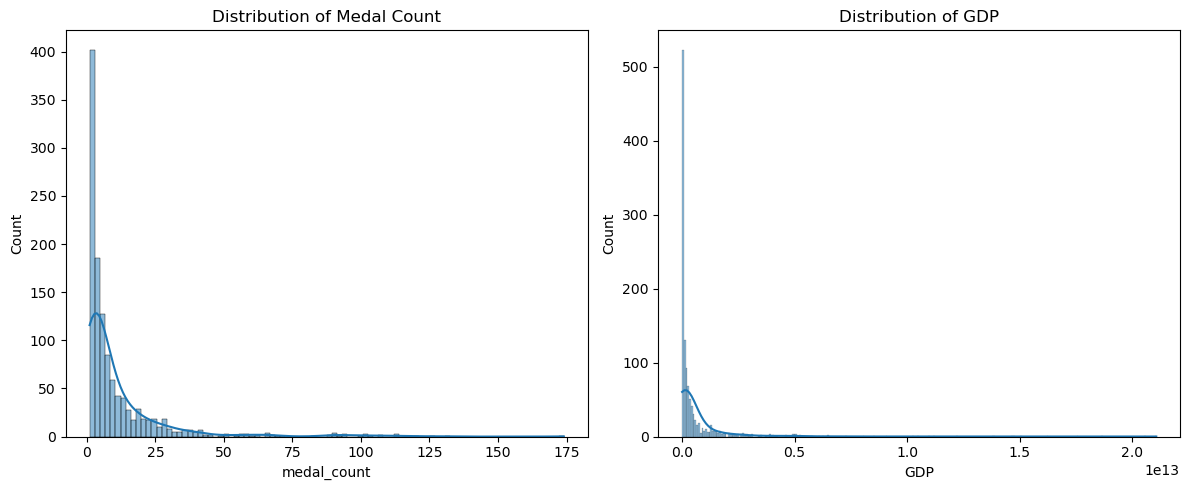

In [24]:
#distributions of medal count & GDP
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['medal_count'], kde=True)
plt.title('Distribution of Medal Count')

plt.subplot(1, 2, 2)
sns.histplot(df['GDP'], kde=True)
plt.title('Distribution of GDP')

plt.tight_layout()
plt.show()

#shows totals bc it's not grouped by anything
#don't know how to interpret?

In [25]:
#convert GDP to 100 millions to get rid of scientific notation
df['GDP']= df['GDP'] / 1e8
df.head()

,country_name,year,medal_count,game_location,game_season,GDP
0,Austria,1992,21,France,Winter,1950.781267
1,Canada,1992,7,France,Winter,5943.760874
2,Czechia,1992,3,France,Winter,348.050132
3,Finland,1992,7,France,Winter,1125.325192
4,France,1992,9,France,Winter,14014.659232


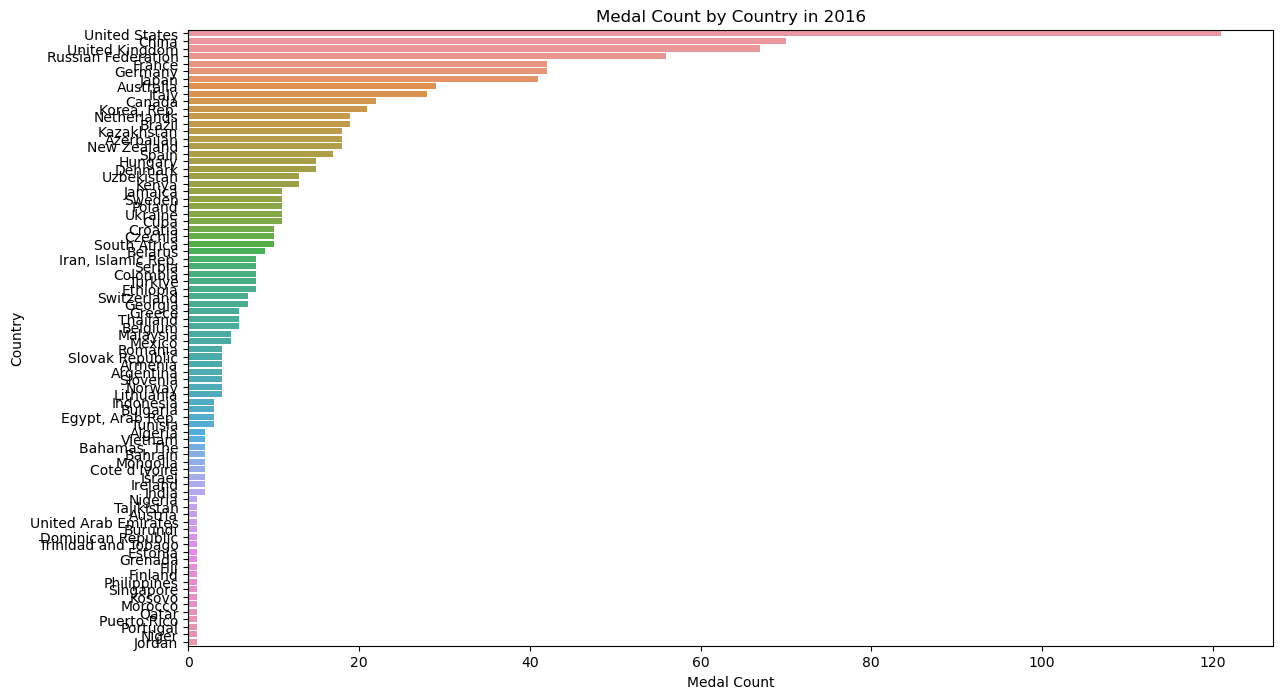

In [40]:
#medal country by country & year
medals_by_country_year= df.groupby(['country_name', 'year'])['medal_count'].sum().reset_index()
medals_by_country_year.head()

#plot medal count by country for specific year
year= 2016 #example 2010
medals_2010 = df[df['year'] == year].groupby('country_name')['medal_count'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='medal_count', y='country_name', data=medals_2010.sort_values(by='medal_count', ascending=False))
plt.title(f'Medal Count by Country in {year}')
plt.xlabel('Medal Count')
plt.ylabel('Country')
plt.show()

#this lists the amount of medals won by a country (medal_count >= 1) for a specified year

#year 2010 graph is pretty, but gets SO messy for more recent years (xx14, xx16)
    #bc more countries are winning medals & it seems to not be based on gdp..

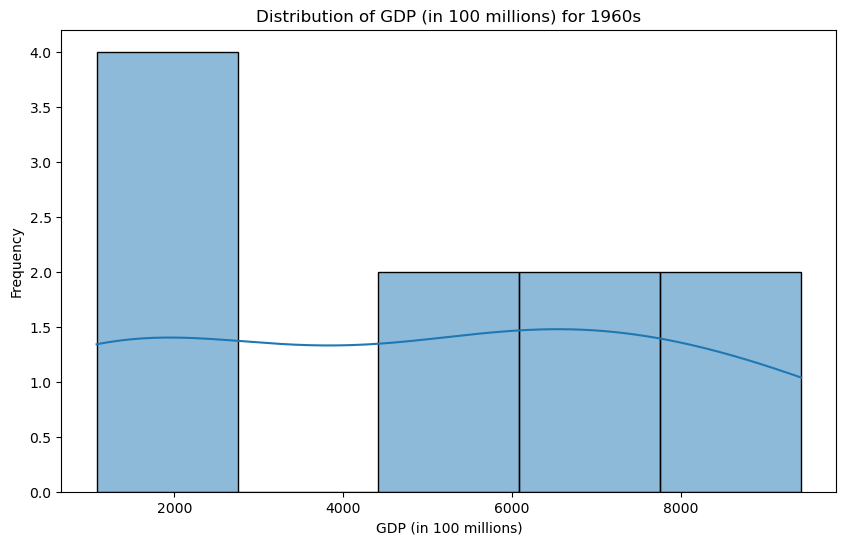

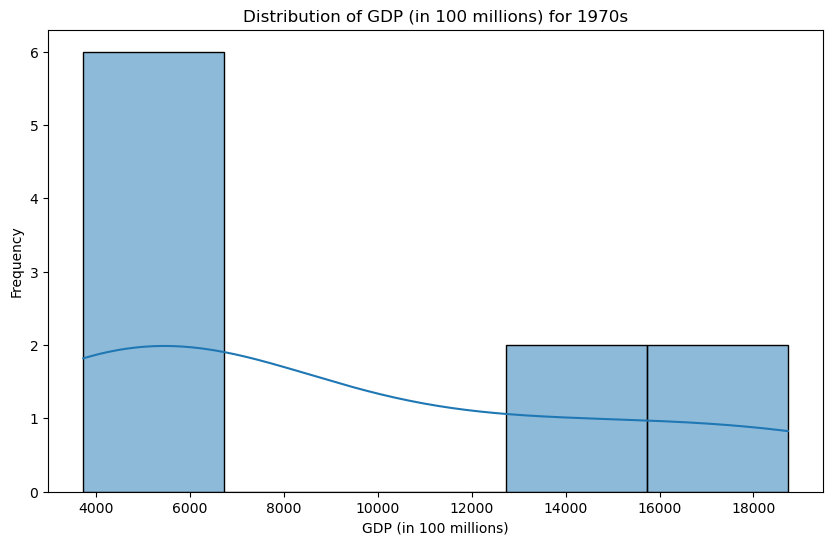

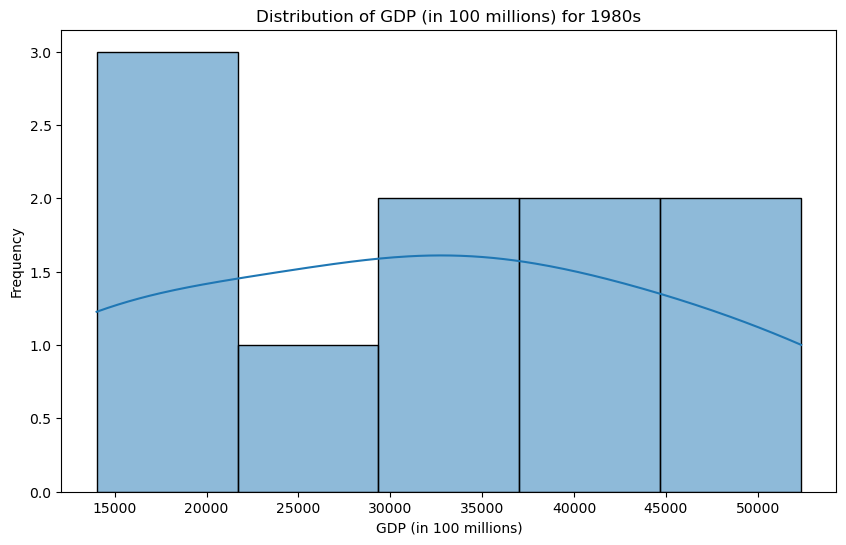

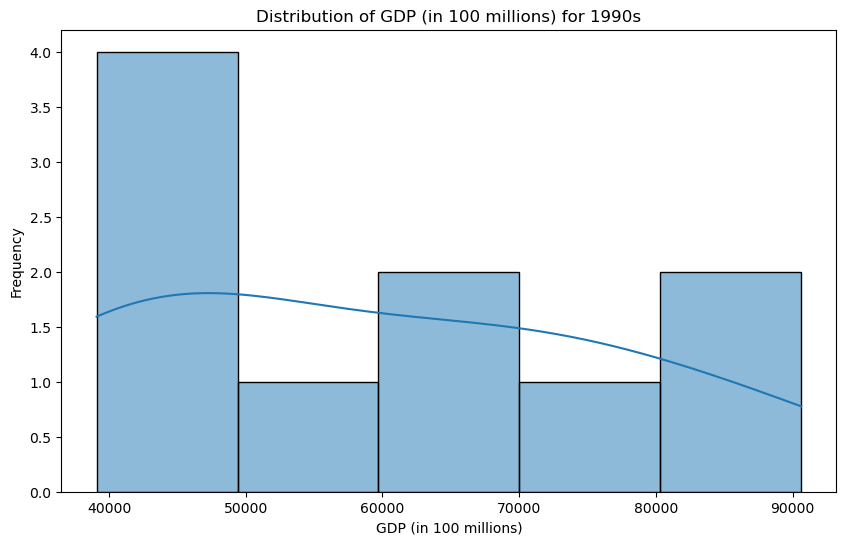

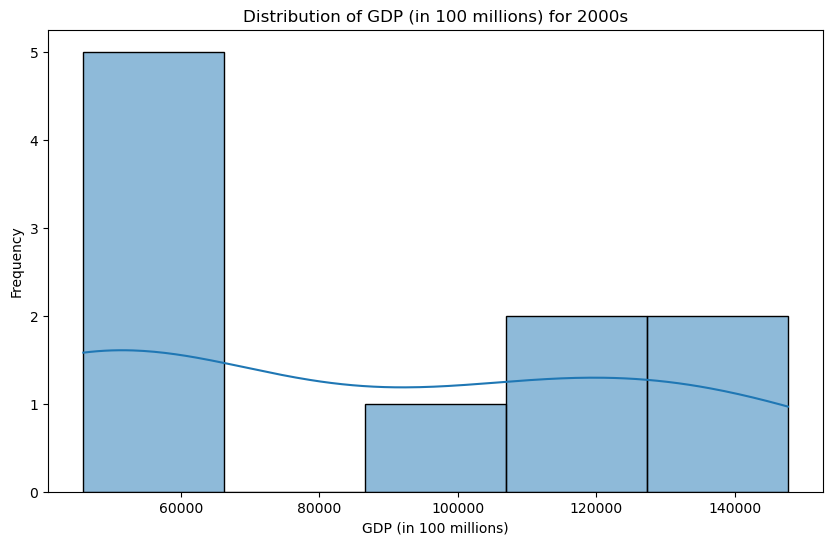

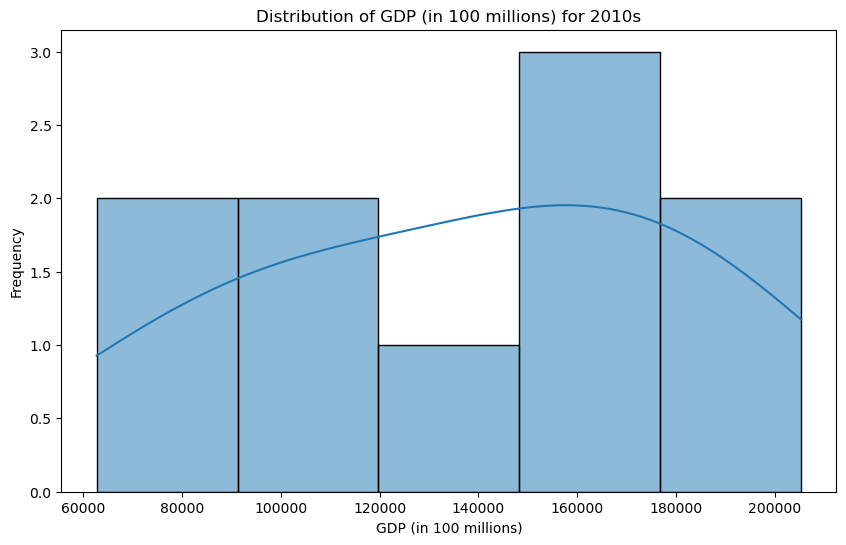

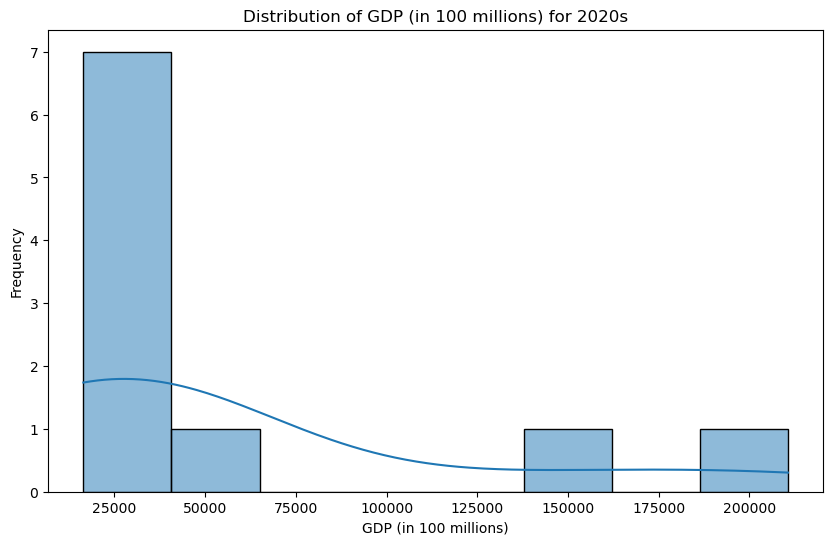

In [4]:
#decade column
df['decade'] = (df['year'] // 10) * 10

#function to get top 10 GDPs per decade
def get_top10_gdp_per_decade(df):
    top10_gdp_per_decade= df.groupby('decade').apply(lambda x: x.nlargest(10, 'GDP (in 100 millions)'))
    return top10_gdp_per_decade

top10_gdp_per_decade= get_top10_gdp_per_decade(df)

#plot
decades= top10_gdp_per_decade['decade'].unique()

for decade in decades:
    plt.figure(figsize=(10, 6))
    sns.histplot(top10_gdp_per_decade[top10_gdp_per_decade['decade'] == decade]['GDP (in 100 millions)'], kde=True)
    plt.title(f'Distribution of GDP (in 100 millions) for {decade}s')
    plt.xlabel('GDP (in 100 millions)')
    plt.ylabel('Frequency')
    plt.show()
    
#this plots the top10 countries (based on their GDP) per decade
    #it doesn't show the countries
    #no clear insight besides GDP growing as time passes.. which is obvious because
        #as time passes, countries grow + have to take into account inflation

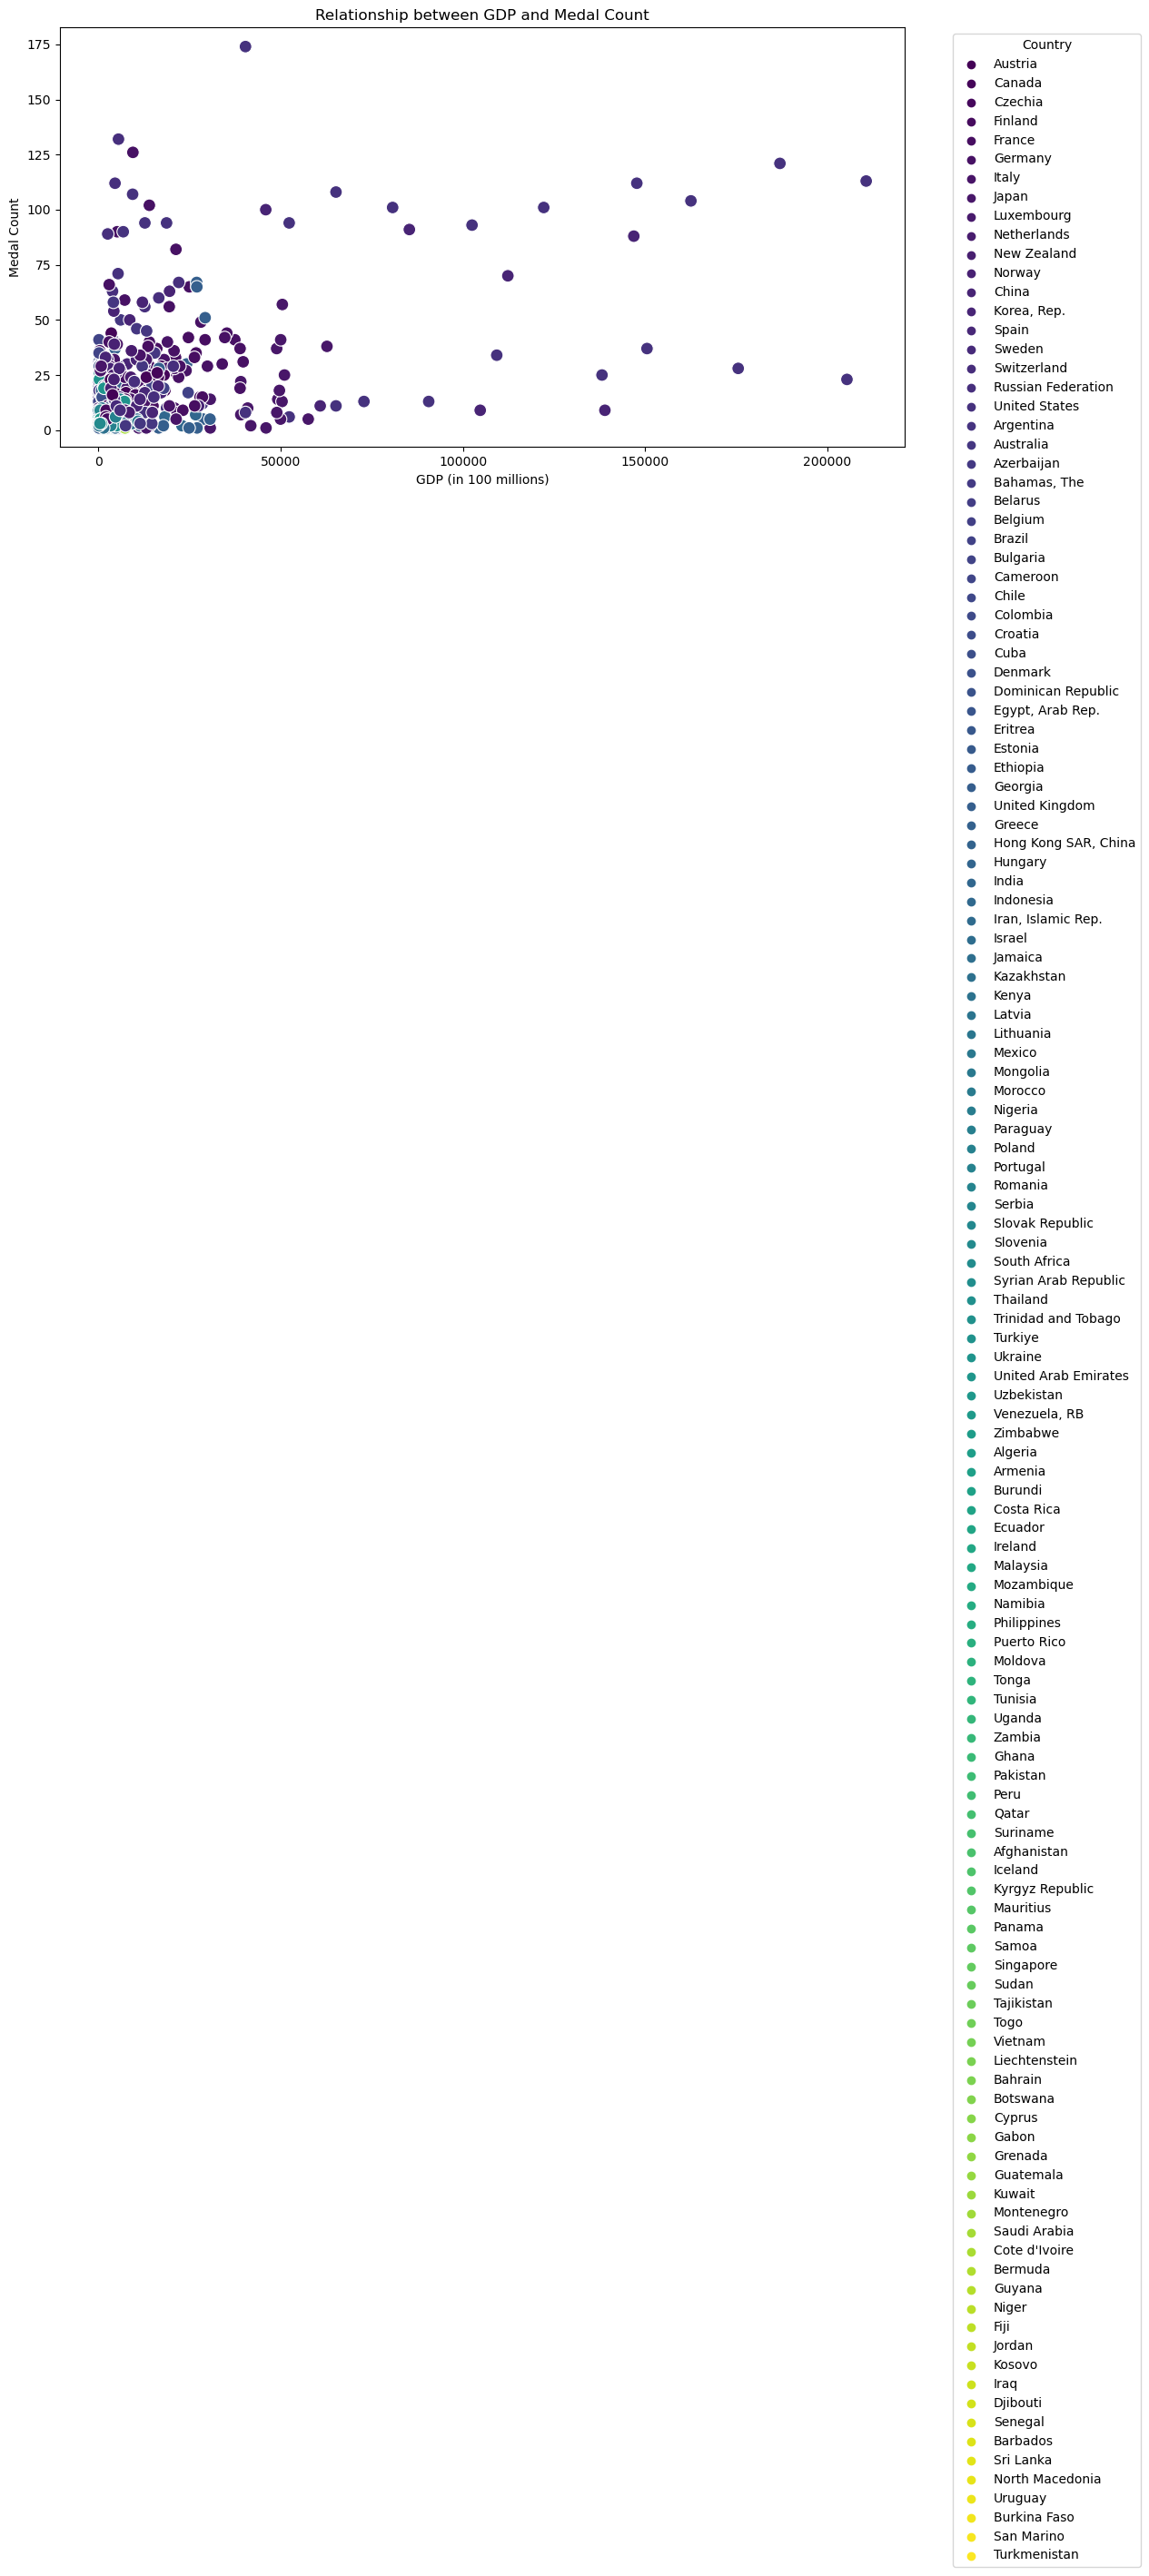

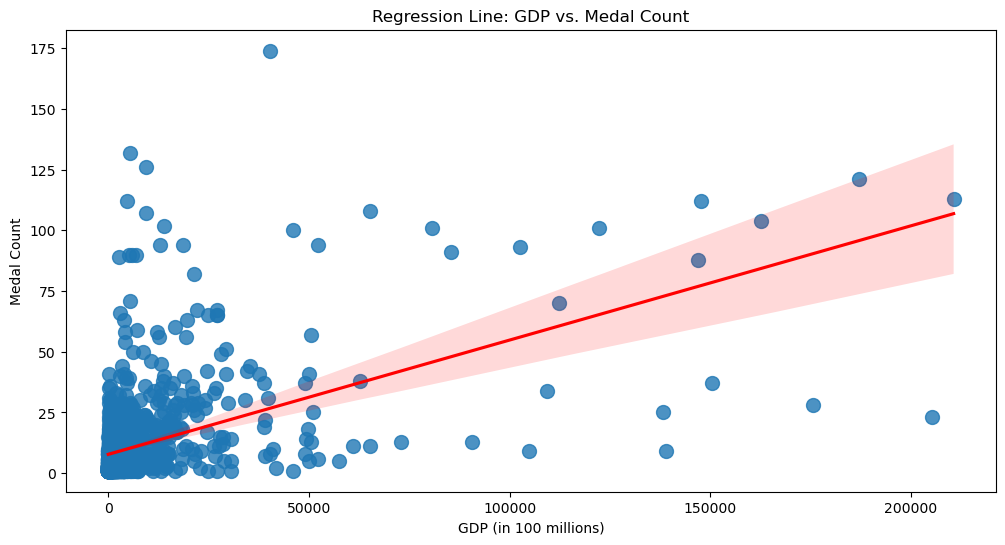

In [38]:
#plot relationship b/w GDP & medal_count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='GDP', y='medal_count', data=df, hue='country_name', palette='viridis', s=100)
plt.title('Relationship between GDP and Medal Count')
plt.xlabel('GDP (in 100 millions)')
plt.ylabel('Medal Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='GDP', y='medal_count', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Regression Line: GDP vs. Medal Count')
plt.xlabel('GDP (in 100 millions)')
plt.ylabel('Medal Count')
plt.show()

#regression line shows a slight positive association, but there are a bunch of outliers,
    #so modeling might not give confident predictions

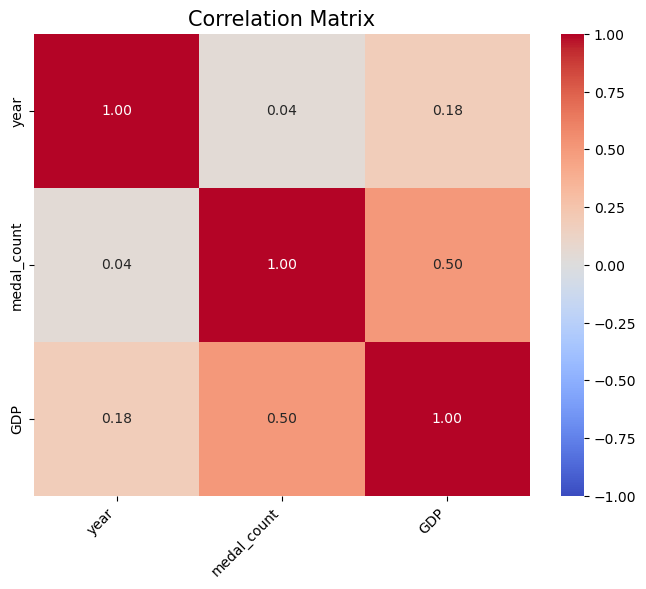

In [37]:
#correlation matrix
#use numeric variables
numeric_cols= ['year', 'medal_count', 'GDP']
corr_matrix= df[numeric_cols].corr()

#plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

#this is proved by the matrix, saying that there is a slight moderate correlation, but what
    #does it say about GDP? the variable gives nothing on a country's consumption + 
    #investment + government spending + net exports
    
#we can't make any clear/strong interpretations